In [2]:
from __future__ import division

from copy import deepcopy
from mcts import mcts
from functools import reduce
import operator

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
class NaughtsAndCrossesState():
    def __init__(self):
        self.board = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
        self.currentPlayer = 1

    def getCurrentPlayer(self):
        return self.currentPlayer

    def getPossibleActions(self):
        possibleActions = []
        for i in range(len(self.board)):
            for j in range(len(self.board[i])):
                if self.board[i][j] == 0:
                    possibleActions.append(Action(player=self.currentPlayer, x=i, y=j))
        return possibleActions

    def takeAction(self, action):
        newState = deepcopy(self)
        newState.board[action.x][action.y] = action.player
        newState.currentPlayer = self.currentPlayer * -1
        return newState

    def isTerminal(self):
        for row in self.board:
            if abs(sum(row)) == 3:
                return True
        for column in list(map(list, zip(*self.board))):
            if abs(sum(column)) == 3:
                return True
        for diagonal in [[self.board[i][i] for i in range(len(self.board))],
                         [self.board[i][len(self.board) - i - 1] for i in range(len(self.board))]]:
            if abs(sum(diagonal)) == 3:
                return True
        return reduce(operator.mul, sum(self.board, []), 1)

    def getReward(self):
        for row in self.board:
            if abs(sum(row)) == 3:
                return sum(row) / 3
        for column in list(map(list, zip(*self.board))):
            if abs(sum(column)) == 3:
                return sum(column) / 3
        for diagonal in [[self.board[i][i] for i in range(len(self.board))],
                         [self.board[i][len(self.board) - i - 1] for i in range(len(self.board))]]:
            if abs(sum(diagonal)) == 3:
                return sum(diagonal) / 3
        return False
    
    def draw_board(self):
        for row in self.board:
            print(row[0], row[1], row[2]) 


class Action():
    def __init__(self, player, x, y):
        self.player = player
        self.x = x
        self.y = y

    def __str__(self):
        return str((self.x, self.y))

    def __repr__(self):
        return str(self)

    def __eq__(self, other):
        return self.__class__ == other.__class__ and self.x == other.x and self.y == other.y and self.player == other.player

    def __hash__(self):
        return hash((self.x, self.y, self.player))

In [9]:
initialState = NaughtsAndCrossesState()

In [10]:
cleaverSearcher = mcts(timeLimit=1000)
foolSearcher = mcts(timeLimit=1000, explorationConstant=0)

In [7]:
state = initialState
state.draw_board()
print("------")

while True:
    # 最適な手を探索
    action = searcher.search(initialState=state)
    
    # 最適手をプレイ
    state = state.takeAction(action)
    
    # 盤面を表示
    state.draw_board()
    
    # 勝敗がついていたら終了
    if state.isTerminal():
        break
        
    print("------")

0 0 0
0 0 0
0 0 0
------
0 0 0
0 1 0
0 0 0
------
-1 0 0
0 1 0
0 0 0
------
-1 0 0
1 1 0
0 0 0
------
-1 0 0
1 1 -1
0 0 0
------
-1 0 1
1 1 -1
0 0 0
------
-1 0 1
1 1 -1
-1 0 0
------
-1 1 1
1 1 -1
-1 0 0
------
-1 1 1
1 1 -1
-1 -1 0
------
-1 1 1
1 1 -1
-1 -1 1


In [12]:
for action, node in searcher.root.children.items():
    print(node.numVisits)

723
224
262
127
3301
321
605
199
564


In [46]:
searcher.root.state.draw_board()

0 0 0
0 0 0
0 0 0


In [51]:
for action, node in searcher.root.children.items():
    node.state.draw_board()
    print("----------")

1 0 0
0 0 0
0 0 0
----------
0 1 0
0 0 0
0 0 0
----------
0 0 1
0 0 0
0 0 0
----------
0 0 0
1 0 0
0 0 0
----------
0 0 0
0 1 0
0 0 0
----------
0 0 0
0 0 1
0 0 0
----------
0 0 0
0 0 0
1 0 0
----------
0 0 0
0 0 0
0 1 0
----------
0 0 0
0 0 0
0 0 1
----------


In [15]:
initialState

In [26]:
pa = initialState.getPossibleActions()
action = pa[0]

In [27]:
dict = {}
dict[action] = 1

In [24]:
dict

{(0, 0): 1}

In [28]:
dict[action]

1

In [29]:
action

(0, 0)

In [39]:
board = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
for row in board:
    print(row[0], row[1], row[2])

0 0 0
0 0 0
0 0 0


In [ ]:
for row in board

([<matplotlib.axis.YTick at 0x7f7fdc75a290>,
 <a list of 4 Text yticklabel objects>)

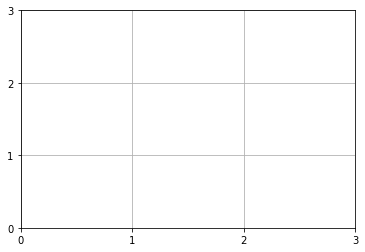

In [38]:
plt.grid()
plt.xlim([0,3])
plt.ylim([0, 3])
plt.xticks(np.arange(0, 3.1, 1))
plt.yticks(np.arange(0, 3.1, 1))